# Using Resnet50

# Author-Md. Shafiur Rahman Khan

# Roll-2207701

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping

resnet_weights_path = "C:\\Users\\User\\Desktop\\Bio Informatics Project 2022\\Md. Shafiur Rahman Khan\\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [2]:
# CALLBACKS

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(patience=5, monitor = 'val_accuracy')
rlp = ReduceLROnPlateau(patience=5, monitor = 'val_accuracy')

callbacks = [es, rlp]

In [3]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale = 1./255
                                   )

test_gen = ImageDataGenerator(rescale = 1./255)

image_size = 224
batch_size = 64

train_generator = train_datagen.flow_from_directory(
        "C:\\Users\\User\\Desktop\\Bio Informatics Project 2022\\Md. Shafiur Rahman Khan\\Train\\Train",
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_gen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Bio Informatics Project 2022\\Md. Shafiur Rahman Khan\\Test\\Test",
    target_size = (image_size, image_size),
    batch_size = batch_size,
    class_mode = 'binary'
)

num_classes = len(train_generator.class_indices)
print('Numer of classes:' ,num_classes)
print('Class labels: ', train_generator.class_indices)




"""
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (size, size),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size = (size, size),
    batch_size = batch_size, 
    class_mode = 'binary'
)

"""

Found 11623 images belonging to 2 classes.
Found 1279 images belonging to 2 classes.
Numer of classes: 2
Class labels:  {'Female': 0, 'Male': 1}


"\ntrain_datagen = ImageDataGenerator(\n    rescale = 1./255, \n    shear_range = 0.2, \n    zoom_range = 0.2,\n    horizontal_flip = True\n)\n\ntest_datagen = ImageDataGenerator(rescale = 1./255)\n\ntrain_generator = train_datagen.flow_from_directory(\n    train_path, \n    target_size = (size, size),\n    batch_size = batch_size,\n    class_mode = 'binary'\n)\n\nvalidation_generator = test_datagen.flow_from_directory(\n    valid_path,\n    target_size = (size, size),\n    batch_size = batch_size, \n    class_mode = 'binary'\n)\n\n"

In [5]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_4 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)             

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.fit_generator(train_generator, steps_per_epoch = int(47000/64) + 1  , epochs = 5, validation_data = validation_generator, callbacks = callbacks)

Epoch 1/5
735/735 [==============================] - 8346s 11s/step - loss: 0.3891 - acc: 0.8391 - val_loss: 1.2765 - val_acc: 0.3925
Epoch 2/5
735/735 [==============================] - 8189s 11s/step - loss: 0.3017 - acc: 0.8690 - val_loss: 1.9678 - val_acc: 0.3925
Epoch 3/5
735/735 [==============================] - 8283s 11s/step - loss: 0.2875 - acc: 0.8765 - val_loss: 1.4487 - val_acc: 0.3925
Epoch 4/5
735/735 [==============================] - 8308s 11s/step - loss: 0.2706 - acc: 0.8836 - val_loss: 1.8062 - val_acc: 0.3925
Epoch 5/5
735/735 [==============================] - 8468s 12s/step - loss: 0.2585 - acc: 0.8911 - val_loss: 1.3620 - val_acc: 0.3925


# Accuracy-89.11%

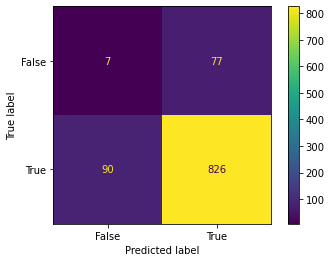

In [10]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()